In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [2]:
dataset=pd.read_csv('./IRIS.csv')

dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset.shape

(150, 5)

In [4]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

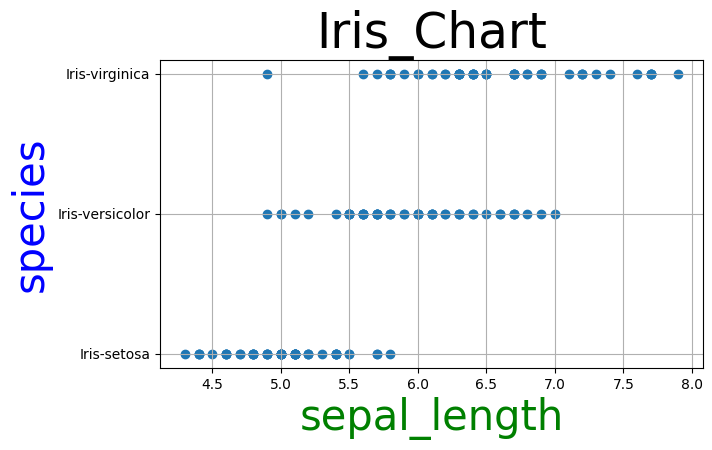

In [9]:
plt.figure(figsize=(7,4),dpi=100)

plt.scatter(dataset.sepal_length,dataset.species)

plt.title('Iris_Chart',size=35,c='black')

plt.xlabel('sepal_length',size=30,c='green')

plt.ylabel('species',size=30,c='blue')

plt.grid()

plt.show()

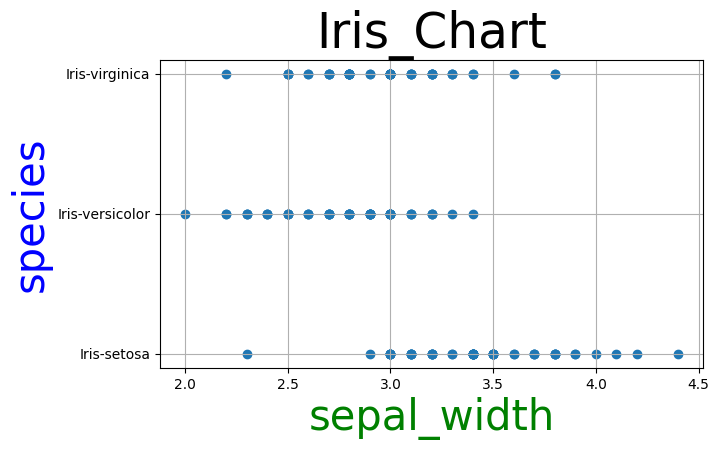

In [10]:
plt.figure(figsize=(7,4),dpi=100)

plt.scatter(dataset.sepal_width,dataset.species)

plt.title('Iris_Chart',size=35,c='black')

plt.xlabel('sepal_width',size=30,c='green')

plt.ylabel('species',size=30,c='blue')

plt.grid()

plt.show()

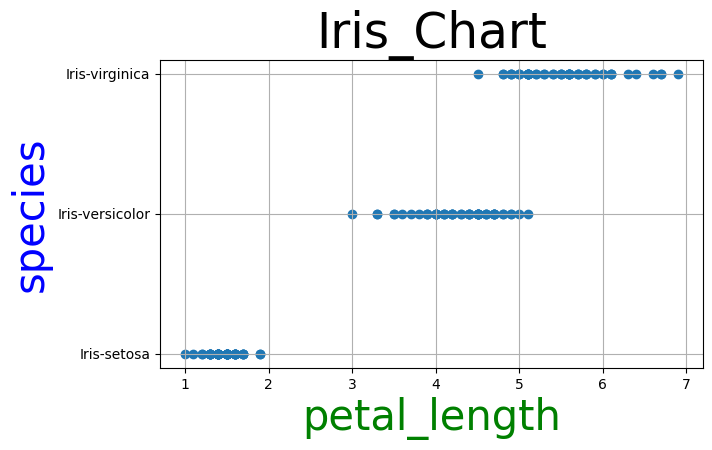

In [11]:
plt.figure(figsize=(7,4),dpi=100)

plt.scatter(dataset.petal_length,dataset.species)

plt.title('Iris_Chart',size=35,c='black')

plt.xlabel('petal_length',size=30,c='green')

plt.ylabel('species',size=30,c='blue')

plt.grid()

plt.show()


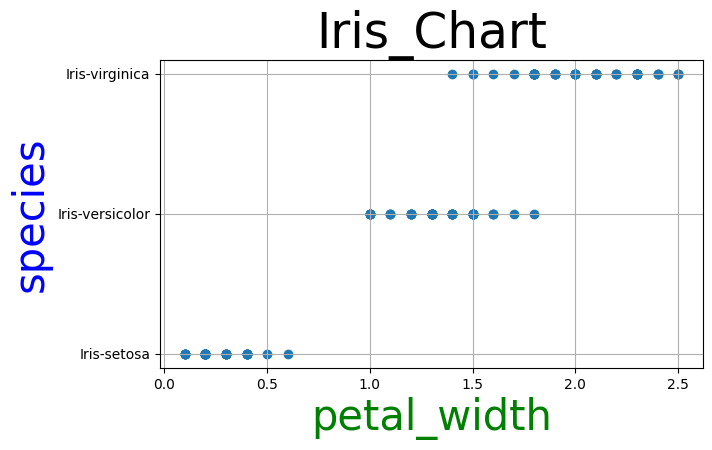

In [12]:
plt.figure(figsize=(7,4),dpi=100)

plt.scatter(dataset.petal_width,dataset.species)
plt.title('Iris_Chart',size=35,c='black')

plt.xlabel('petal_width',size=30,c='green')

plt.ylabel('species',size=30,c='blue')

plt.grid()

plt.show()

In [14]:
# dataset.drop('Id',axis=1,inplace=True)
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
print(pd.unique(dataset["species"]))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [16]:
dataset["species"].replace({"Iris-setosa": 2, "Iris-versicolor": 3, "Iris-virginica": 4}, inplace = True)

In [17]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
x=pd.DataFrame(dataset,columns=["sepal_length","sepal_width","petal_length","petal_width"]).values
y=dataset.species.values.reshape(-1,1)

In [19]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
y

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
    

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=4)

In [22]:
x_train

array([[4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [5.6, 2.9, 3.6, 1.3],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5. , 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.9, 3.2, 5.7, 2.3],
       [5.4, 3.4, 1.5, 0.4],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.6, 1.4, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 2.8, 4.6, 1.5],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 3

In [23]:
y_train

array([[2],
       [2],
       [3],
       [3],
       [4],
       [2],
       [3],
       [4],
       [4],
       [3],
       [3],
       [2],
       [3],
       [4],
       [3],
       [2],
       [3],
       [2],
       [3],
       [4],
       [3],
       [4],
       [3],
       [2],
       [4],
       [4],
       [2],
       [3],
       [4],
       [2],
       [4],
       [3],
       [4],
       [3],
       [2],
       [4],
       [3],
       [4],
       [2],
       [4],
       [3],
       [4],
       [3],
       [4],
       [3],
       [3],
       [4],
       [3],
       [3],
       [4],
       [3],
       [3],
       [2],
       [4],
       [2],
       [3],
       [2],
       [3],
       [3],
       [3],
       [3],
       [2],
       [4],
       [4],
       [3],
       [3],
       [3],
       [2],
       [2],
       [4],
       [4],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [3],
       [2],
       [2],
       [2],
    

In [24]:
x_test

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 2. , 3.5, 1. ],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3. , 4.5, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5. , 2

In [25]:
y_test

array([[4],
       [2],
       [4],
       [4],
       [4],
       [3],
       [3],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [3],
       [4],
       [2],
       [3],
       [2],
       [2],
       [4],
       [2],
       [4],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [3],
       [2],
       [4],
       [2],
       [3],
       [4],
       [4],
       [3],
       [3],
       [2],
       [4],
       [2],
       [3],
       [2],
       [4]], dtype=int64)

In [26]:
k=7

clf=KNeighborsClassifier(k)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

C:\Users\shash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [27]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.9777777777777777


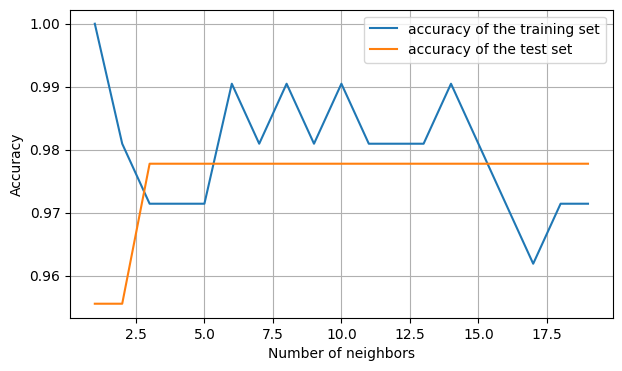

In [28]:
training_acc=[]
test_acc=[]

neighbors_setting=range(1,20)

for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))
    
plt.figure(figsize=(7,4),dpi=100)

plt.plot(neighbors_setting,training_acc,label="accuracy of the training set")

plt.plot(neighbors_setting,test_acc,label="accuracy of the test set")

plt.xlabel("Number of neighbors")

plt.ylabel("Accuracy")

plt.grid()

plt.legend()

plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
parameters={"n_neighbors":range(1,50)}

grid_knn=GridSearchCV(estimator=knn,param_grid=parameters,scoring="accuracy",cv=5,verbose=1,n_jobs=-1)

grid_knn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [31]:
grid_knn.best_params_

{'n_neighbors': 6}